# Stage 1 - Data Cleaning

In [2]:
#Before importing data column with blatant missing data was removed - column removed was
#import dataframes into python for cleaning
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
Application_record = pd.read_csv("C:/Users/jaite/Uni/Principles of Data Science/Project/application_record.csv")
Credit_record = pd.read_csv("C:/Users/jaite/Uni/Principles of Data Science/Project/credit_record.csv")

In [3]:
Application_record.head()

,ID,GENDER,OWNS CAR,OWNS REALESTATE,No. OF CHILDREN,ANNUAL INCOME,INCOME CATEGORY,HIGHEST EDU. LEVEL,MARITAL STATUS,WAY OF LIVING,BIRTHDAY,DAYS EMPLOYED,HAS A PERSONAL MOBILE,HAS A WORK PHONE,HAS A PHONE,HAS AN EMAIL,No. OF FAMILY MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1


In [4]:
#To change - Birthday to age (conversion of days to years), Days employed can be negative to show how long they have been
#employed if positive that is unemployed days this is ratio data want to convert to years
Credit_record.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In the credit records, the follow key indicates what each designation means

0 = 1-29 days

1 = 30-59 days

2 = 60-89 days

3 = 90-119 days 

4 = 120-149 days

5 = Overdue or bad debts (more than 150 days)

C = Paid off that month (0)

X = No loan for the month (0)

In [5]:
#saving all columns to a variable as a list
columns_application_records = list(Application_record.columns)
columns_credit_score = list(Credit_record.columns)

In [6]:
columns_application_records

['ID',
 'GENDER',
 'OWNS CAR',
 'OWNS REALESTATE',
 'No. OF CHILDREN',
 'ANNUAL INCOME',
 'INCOME CATEGORY',
 'HIGHEST EDU. LEVEL',
 'MARITAL STATUS',
 'WAY OF LIVING',
 'BIRTHDAY',
 'DAYS EMPLOYED',
 'HAS A PERSONAL MOBILE',
 'HAS A WORK PHONE',
 'HAS A PHONE',
 'HAS AN EMAIL',
 'No. OF FAMILY MEMBERS']

In [7]:
columns_credit_score

['ID', 'MONTHS_BALANCE', 'STATUS']

In [8]:
#check for any missing values in dataframes
print("distribution of missing values")
print(Application_record.isnull().mean())

distribution of missing values
ID                       0.0
GENDER                   0.0
OWNS CAR                 0.0
OWNS REALESTATE          0.0
No. OF CHILDREN          0.0
ANNUAL INCOME            0.0
INCOME CATEGORY          0.0
HIGHEST EDU. LEVEL       0.0
MARITAL STATUS           0.0
WAY OF LIVING            0.0
BIRTHDAY                 0.0
DAYS EMPLOYED            0.0
HAS A PERSONAL MOBILE    0.0
HAS A WORK PHONE         0.0
HAS A PHONE              0.0
HAS AN EMAIL             0.0
No. OF FAMILY MEMBERS    0.0
dtype: float64


In [9]:
print("distribution of missing values")
print(Credit_record.isnull().mean())

distribution of missing values
ID                0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64


In [10]:
print("types of data")
print(Application_record.info())
print(Credit_record.info())

types of data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     438557 non-null  int64  
 1   GENDER                 438557 non-null  object 
 2   OWNS CAR               438557 non-null  object 
 3   OWNS REALESTATE        438557 non-null  object 
 4   No. OF CHILDREN        438557 non-null  int64  
 5   ANNUAL INCOME          438557 non-null  float64
 6   INCOME CATEGORY        438557 non-null  object 
 7   HIGHEST EDU. LEVEL     438557 non-null  object 
 8   MARITAL STATUS         438557 non-null  object 
 9   WAY OF LIVING          438557 non-null  object 
 10  BIRTHDAY               438557 non-null  int64  
 11  DAYS EMPLOYED          438557 non-null  int64  
 12  HAS A PERSONAL MOBILE  438557 non-null  int64  
 13  HAS A WORK PHONE       438557 non-null  int64  
 14  HAS A PHONE           

In [11]:
#divised function to convert number of days to years
def my_function(i):
    return i/365

In [12]:
#converted "birthday" from days to years
Application_record["BIRTHDAY"] = Application_record["BIRTHDAY"].apply(my_function)

In [13]:
#converted "days employed" from days to years
Application_record["DAYS EMPLOYED"] = Application_record["DAYS EMPLOYED"].apply(my_function)

In [14]:
Application_record

,ID,GENDER,OWNS CAR,OWNS REALESTATE,No. OF CHILDREN,ANNUAL INCOME,INCOME CATEGORY,HIGHEST EDU. LEVEL,MARITAL STATUS,WAY OF LIVING,BIRTHDAY,DAYS EMPLOYED,HAS A PERSONAL MOBILE,HAS A WORK PHONE,HAS A PHONE,HAS AN EMAIL,No. OF FAMILY MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.890411,-12.443836,1,1,0,0,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-32.890411,-12.443836,1,1,0,0,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-58.832877,-3.106849,1,0,0,0,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-52.356164,-8.358904,1,0,1,1,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-52.356164,-8.358904,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,7999660,F,N,N,0,90000.0,State servant,Higher education,Single / not married,House / apartment,-36.800000,-14.920548,1,0,0,0,1
438553,7999696,F,N,Y,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-34.454795,-12.005479,1,0,0,0,4
438554,7999738,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-27.315068,-0.326027,1,0,0,0,2
438555,7999784,F,Y,Y,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-29.123288,-1.243836,1,0,0,0,3


In [136]:

# Removal of X and C from STATUS column 
Credit_record = Credit_record[~Credit_record['STATUS'].isin(['X', 'C'])]

# Conversion to string type value
Credit_record['STATUS'] = Credit_record['STATUS'].astype(str)

# Removal of letters from 'STATUS' column and replacing with an empty string
Credit_record['STATUS'] = Credit_record['STATUS'].str.replace('[^0-9]', '', regex=True)

# Replacing all empty values with a zero 
Credit_record['STATUS'] = Credit_record['STATUS'].replace('', '0')

# Converting the 'STATUS' column from string to integer values
Credit_record['STATUS'] = Credit_record['STATUS'].astype(int)


# Define the replacement function for the values and assuming that each credit card holder has been overdue up to a certain number of days as we do not know the exact number of days they are overdue
def replace_value(value):
    if value == 0:
        return 29 
    elif value == 1:
        return 59
    elif value == 2:
        return 89
    elif value == 3:
        return 119
    elif value == 4:
        return 149
    elif value == 5:
        return 150
    else:
        return value

# Apply the replacement function to the 'STATUS' column
Credit_record['STATUS'] = Credit_record['STATUS'].apply(replace_value)

# Display the modified DataFrame
print(Credit_record)
Credit_record.info()


             ID  MONTHS_BALANCE  STATUS  Loan Grant Month  observation window
0       5001711              -1      29                -3                   2
1       5001711              -2      29                -3                   2
2       5001711              -3      29                -3                   2
3       5001712              -9      29               -18                   9
4       5001712             -10      29               -18                   9
...         ...             ...     ...               ...                 ...
397309  5150484             -10      29               -12                  11
397310  5150484             -11      29               -12                  11
397311  5150484             -12      29               -12                  11
397312  5150485               0      29                -1                   1
397313  5150485              -1      29                -1                   1

[397314 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>

In [17]:
Credit_record.info()
#Credit_record

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397314 entries, 1 to 1048544
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ID              397314 non-null  int64
 1   MONTHS_BALANCE  397314 non-null  int64
 2   STATUS          397314 non-null  int64
dtypes: int64(3)
memory usage: 12.1 MB


In [18]:
Credit_record

,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,29
2,5001711,-2,29
3,5001711,-3,29
13,5001712,-9,29
14,5001712,-10,29
...,...,...,...
1048540,5150484,-10,29
1048541,5150484,-11,29
1048542,5150484,-12,29
1048543,5150485,0,29


In [19]:
Credit_record.head(100)

,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,29
2,5001711,-2,29
3,5001711,-3,29
13,5001712,-9,29
14,5001712,-10,29
15,5001712,-11,29
16,5001712,-12,29
17,5001712,-13,29
18,5001712,-14,29
19,5001712,-15,29


In [20]:
import matplotlib as plot
import numpy as np
#first we must see how many unique IDs are in common for both the credit and application records by using the set.intersection()
#method

len(set(Application_record['ID']).intersection(set(Credit_record['ID'])))



32002

In [21]:
#group all the IDs together to make them easier to work with then 
Credit_IDs_grouped=Credit_record.groupby('ID')
pivot_credit=Credit_record.pivot(index='ID', columns='MONTHS_BALANCE', values='STATUS') #converts each ID to a row with 'MONTHS_BALANCE' is the column with the status filling each corresponding cell of that column
pivot_credit['Loan Grant Month']=Credit_IDs_grouped['MONTHS_BALANCE'].min() #adds a new column to the pivot table indicating when the loan was granted for each ID
pivot_credit['Loan Withdrawal Month']=Credit_IDs_grouped['MONTHS_BALANCE'].max() #adds a new column to the pivot table representing when the loan was closed
#only want the grant month of the loan and the withdrawl month so the columns of other data will be removed

pivot_credit['observation window']=pivot_credit['Loan Withdrawal Month']-pivot_credit['Loan Grant Month']#adds a new column to the pivot table with shows how long the account has been observed for since the granting of loan
pivot_credit['ID']=pivot_credit.index
pivot_credit=pivot_credit[['ID', 'Loan Grant Month', 'observation window']]
pivot_credit.reset_index(drop=True, inplace=True)
pivot_credit



MONTHS_BALANCE,ID,Loan Grant Month,observation window
0,5001711,-3,2
1,5001712,-18,9
2,5001717,-21,16
3,5001718,-37,34
4,5001719,-42,1
...,...,...,...
40027,5150477,-19,16
40028,5150480,-49,5
40029,5150482,-28,11
40030,5150484,-12,11


In [22]:
Credit_record=pd.merge(Credit_record, pivot_credit, on='ID', how='left')#calculated information is added to credit record 
Credit_record

,ID,MONTHS_BALANCE,STATUS,Loan Grant Month,observation window
0,5001711,-1,29,-3,2
1,5001711,-2,29,-3,2
2,5001711,-3,29,-3,2
3,5001712,-9,29,-18,9
4,5001712,-10,29,-18,9
...,...,...,...,...,...
397309,5150484,-10,29,-12,11
397310,5150484,-11,29,-12,11
397311,5150484,-12,29,-12,11
397312,5150485,0,29,-1,1


In [23]:
pivot_accounts_opened = pivot_credit.pivot_table(index='Loan Grant Month', values='ID', aggfunc='count')
pivot_accounts=pivot_accounts_opened.reset_index() #this is what is known as the denominator indicating how many IDs opened an account in each month
pivot_accounts

MONTHS_BALANCE,Loan Grant Month,ID
0,-60,230
1,-59,331
2,-58,359
3,-57,307
4,-56,377
5,-55,392
6,-54,362
7,-53,404
8,-52,444
9,-51,479


In [24]:
vintage_table = pivot_credit.pivot_table(index='observation window', values='ID', aggfunc='count')
vintage_table = vintage_table.reset_index()
vintage_table.columns = ['observation window', 'ID']
vintage_table

,observation window,ID
0,0,2636
1,1,1982
2,2,2550
3,3,2805
4,4,2797
5,5,3857
6,6,2103
7,7,2067
8,8,2010
9,9,2410


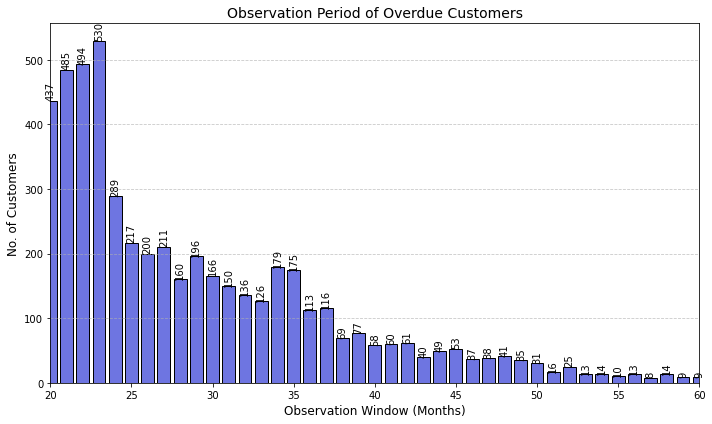

In [25]:
import matplotlib.pyplot as plt

filtered_table = vintage_table[(vintage_table['observation window'] >= 20) & (vintage_table['observation window'] <= 60)]

if filtered_table.empty:
    print("No data available for the specified observation windows.")
else:    
    bar_color = '#6e75e1'
    label_color = 'black'
    
    fig, ax = plt.subplots(figsize=(10, 6))

    observation_period_of_overdue_customers = ax.bar(filtered_table['observation window'], filtered_table['ID'], color=bar_color, edgecolor='black')

    for i, bar in enumerate(observation_period_of_overdue_customers):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, filtered_table['ID'].iloc[i], ha='center', va='bottom', rotation='vertical', color=label_color)

    ax.set_xlabel('Observation Window (Months)', fontsize=12)
    ax.set_ylabel('No. of Customers', fontsize=12)
    ax.set_title('Observation Period of Overdue Customers', fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlim(20, 60)

    plt.tight_layout()

    plt.show()


In [26]:

# Group by 'ID' and calculate the average of 'STATUS' and 'observation window'
average_status = Credit_record.groupby('ID')[['STATUS', 'observation window']].mean().reset_index()

# Rename the columns
average_status.columns = ['ID', 'Average_STATUS', 'Average_observation_window']
average_status.rename(columns = {'ID':'Customer ID', 'Average_STATUS':'Average Overdue Length (days)','Average_observation_window':'Observation Period of Overdue Payment (avg in months)'}, inplace = True)
average_status = average_status[average_status['Observation Period of Overdue Payment (avg in months)'] >= 20]


average_status = average_status.reset_index(drop=True)
(average_status)



,Customer ID,Average Overdue Length (days),Observation Period of Overdue Payment (avg in months)
0,5001718,31.307692,34.0
1,5001720,34.833333,35.0
2,5001758,29.000000,23.0
3,5001772,29.000000,22.0
4,5001786,30.428571,20.0
...,...,...,...
5155,5150210,32.750000,32.0
5156,5150229,29.000000,34.0
5157,5150390,29.000000,25.0
5158,5150391,29.000000,23.0


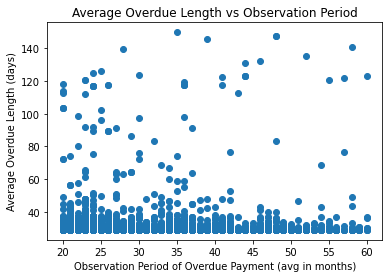

In [27]:

plt.scatter(average_status['Observation Period of Overdue Payment (avg in months)'],
            average_status['Average Overdue Length (days)'])

plt.xlabel('Observation Period of Overdue Payment (avg in months)')
plt.ylabel('Average Overdue Length (days)')
plt.title('Average Overdue Length vs Observation Period')

plt.show()

In [36]:
shared_values = set(average_status['Customer ID']).intersection(set(Application_record['ID']))

average_status = average_status[average_status['Customer ID'].isin(shared_values)]

merged_data = pd.merge(average_status, Application_record, left_on='Customer ID', right_on='ID', how='inner')

merged_data

merged_data.rename(columns={'DAYS EMPLOYED': 'Period of Employment',
                            'BIRTHDAY': 'Age',
                            'ANNUAL INCOME': 'Annual Income',
                            'No. OF FAMILY MEMBERS': 'Family Members'}, inplace=True)
merged_data


,Customer ID,Average Overdue Length (days),Observation Period of Overdue Payment (avg in months),ID,GENDER,OWNS CAR,OWNS REALESTATE,No. OF CHILDREN,Annual Income,INCOME CATEGORY,HIGHEST EDU. LEVEL,MARITAL STATUS,WAY OF LIVING,Age,Period of Employment,HAS A PERSONAL MOBILE,HAS A WORK PHONE,HAS A PHONE,HAS AN EMAIL,Family Members
0,5008806,29.000000,20.0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-58.832877,-3.106849,1,0,0,0,2
1,5008825,30.153846,25.0,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-29.230137,-3.021918,1,0,0,0,2
2,5008838,29.000000,28.0,5008838,M,N,Y,1,405000.0,Commercial associate,Higher education,Married,House / apartment,-32.443836,-5.523288,1,0,0,0,3
3,5008844,29.000000,25.0,5008844,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-56.169863,-12.191781,1,0,1,0,2
4,5008847,29.000000,25.0,5008847,M,Y,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-56.169863,-12.191781,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,5150210,32.750000,32.0,5150210,F,N,Y,0,81000.0,Working,Secondary / secondary special,Married,House / apartment,-42.032877,-15.857534,1,0,0,0,2
3521,5150229,29.000000,34.0,5150229,F,Y,Y,0,139500.0,Working,Incomplete higher,Married,House / apartment,-39.964384,-19.446575,1,1,0,0,2
3522,5150390,29.000000,25.0,5150390,F,Y,Y,1,315000.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-44.095890,-21.860274,1,0,0,0,3
3523,5150391,29.000000,23.0,5150391,F,Y,Y,1,315000.0,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-44.095890,-21.860274,1,0,0,0,3


In [47]:
idx_dic = {}
for col in merged_data.columns:
    idx_dic[col] = merged_data.columns.get_loc(col)
print(idx_dic)

merged_data


{'Customer ID': 0, 'Average Overdue Length (days)': 1, 'Observation Period of Overdue Payment (avg in months)': 2, 'Annual Income': 3, 'Age': 4, 'Period of Employment': 5, 'Family Members': 6}


,Customer ID,Average Overdue Length (days),Observation Period of Overdue Payment (avg in months),Annual Income,Age,Period of Employment,Family Members
0,5008806,29.000000,20.0,112500.0,-58.832877,-3.106849,2
1,5008825,30.153846,25.0,130500.0,-29.230137,-3.021918,2
2,5008838,29.000000,28.0,405000.0,-32.443836,-5.523288,3
3,5008844,29.000000,25.0,112500.0,-56.169863,-12.191781,2
4,5008847,29.000000,25.0,112500.0,-56.169863,-12.191781,2
...,...,...,...,...,...,...,...
3520,5150210,32.750000,32.0,81000.0,-42.032877,-15.857534,2
3521,5150229,29.000000,34.0,139500.0,-39.964384,-19.446575,2
3522,5150390,29.000000,25.0,315000.0,-44.095890,-21.860274,3
3523,5150391,29.000000,23.0,315000.0,-44.095890,-21.860274,3


In [53]:
merged_data['Period of Employment'] = merged_data['Period of Employment'] * 12
merged_data

,Customer ID,Average Overdue Length (days),Observation Period of Overdue Payment (avg in months),Annual Income,Age,Period of Employment,Family Members
0,5008806,29.000000,20.0,112500.0,-58.832877,-447.386301,2
1,5008825,30.153846,25.0,130500.0,-29.230137,-435.156164,2
2,5008838,29.000000,28.0,405000.0,-32.443836,-795.353425,3
3,5008844,29.000000,25.0,112500.0,-56.169863,-1755.616438,2
4,5008847,29.000000,25.0,112500.0,-56.169863,-1755.616438,2
...,...,...,...,...,...,...,...
3520,5150210,32.750000,32.0,81000.0,-42.032877,-2283.484932,2
3521,5150229,29.000000,34.0,139500.0,-39.964384,-2800.306849,2
3522,5150390,29.000000,25.0,315000.0,-44.095890,-3147.879452,3
3523,5150391,29.000000,23.0,315000.0,-44.095890,-3147.879452,3


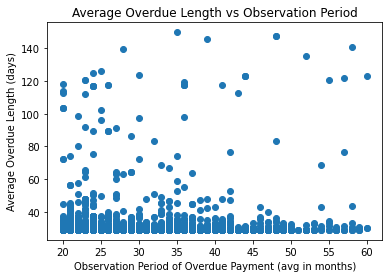

In [134]:
plt.scatter(merged_data['Observation Period of Overdue Payment (avg in months)'],
            merged_data['Average Overdue Length (days)'])

plt.xlabel('Observation Period of Overdue Payment (avg in months)')
plt.ylabel('Average Overdue Length (days)')
plt.title('Average Overdue Length vs Observation Period')

plt.show()

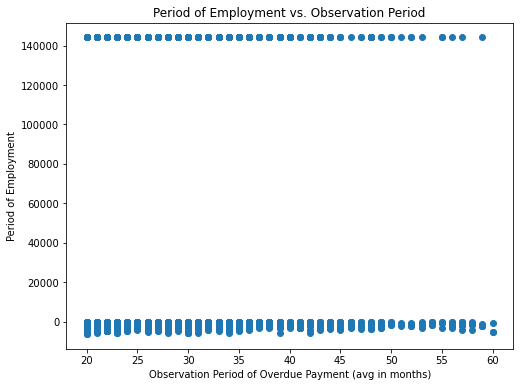

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Observation Period of Overdue Payment (avg in months)'], merged_data['Period of Employment'])
plt.xlabel('Observation Period of Overdue Payment (avg in months)')
plt.ylabel('Period of Employment')
plt.title('Period of Employment vs. Observation Period')
plt.show()


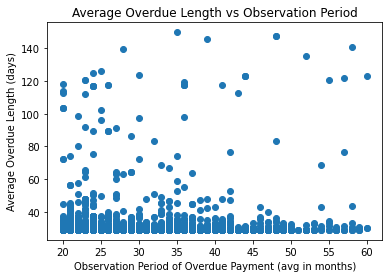

In [133]:
plt.scatter(merged_data['Observation Period of Overdue Payment (avg in months)'], merged_data['Average Overdue Length (days)'])

plt.xlabel('Observation Period of Overdue Payment (avg in months)')
plt.ylabel('Average Overdue Length (days)')
plt.title('Average Overdue Length vs Observation Period')

plt.show()

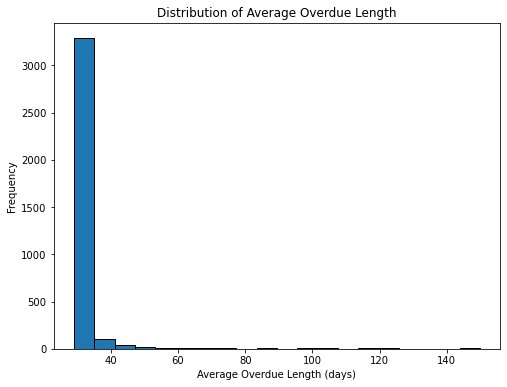

In [125]:
# Histogram for "Average Overdue Length (days)"
plt.figure(figsize=(8, 6))
plt.hist(merged_data['Average Overdue Length (days)'], bins=20, edgecolor='black')
plt.xlabel('Average Overdue Length (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Overdue Length')
plt.show()

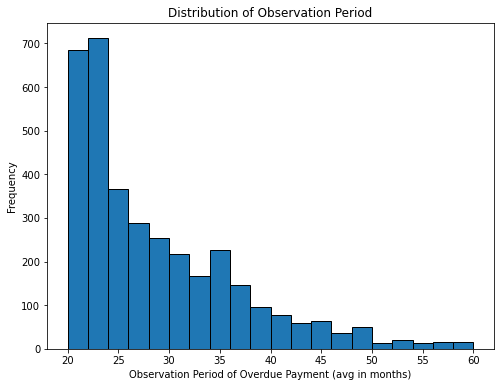

In [126]:
# Histogram of "Observation Period of Overdue Payment (avg in months)"
plt.figure(figsize=(8, 6))
plt.hist(merged_data['Observation Period of Overdue Payment (avg in months)'], bins=20, edgecolor='black')
plt.xlabel('Observation Period of Overdue Payment (avg in months)')
plt.ylabel('Frequency')
plt.title('Distribution of Observation Period')
plt.show()

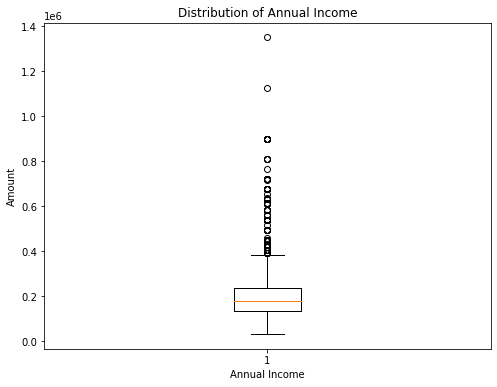

In [127]:
# Box Plot for "Annual Income"
plt.figure(figsize=(8, 6))
plt.boxplot(merged_data['Annual Income'])
plt.xlabel('Annual Income')
plt.ylabel('Amount')
plt.title('Distribution of Annual Income')
plt.show()

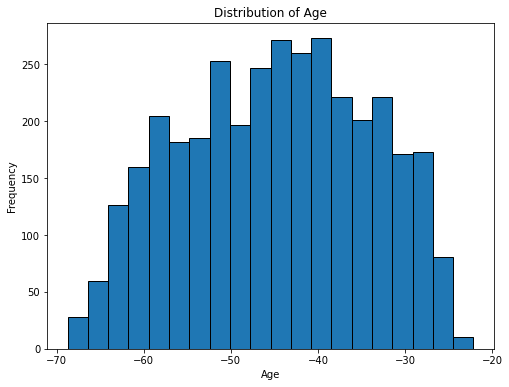

In [146]:
# Histogram of distribution of "Age"
plt.figure(figsize=(8, 6))
plt.hist(merged_data['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


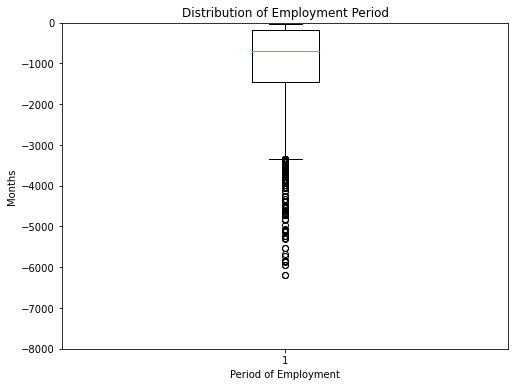

In [129]:
# Box Plot for "Period of Employment"
plt.figure(figsize=(8, 6))
plt.boxplot(merged_data['Period of Employment'])
plt.xlabel('Period of Employment')
plt.ylabel('Months')
plt.title('Distribution of Employment Period')

# Set the y-axis range
plt.ylim(-8000, 0)

plt.show()

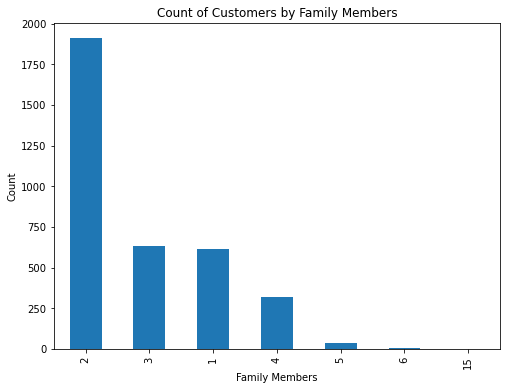

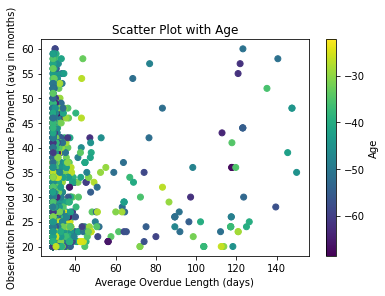

In [148]:
import matplotlib.pyplot as plt

plt.scatter(merged_data['Average Overdue Length (days)'], merged_data['Observation Period of Overdue Payment (avg in months)'], c=merged_data['Age'], cmap='viridis')

plt.xlabel('Average Overdue Length (days)')
plt.ylabel('Observation Period of Overdue Payment (avg in months)')
plt.title('Scatter Plot with Age')

plt.colorbar(label='Age')
plt.show()


In [121]:
#logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

# Prepare the data
X = merged_data[['Average Overdue Length (days)', 'Annual Income', 'Age', 'Period of Employment', 'Family Members']]
y = merged_data['Observation Period of Overdue Payment (avg in months)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create an instance of Logistic Regression model with adjusted parameters
logreg = LogisticRegression(solver='liblinear', max_iter=1000)

# Suppress the convergence warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Fit the model to the training data
    logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.09278350515463918


In [149]:
#clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare the data
X = merged_data[['Average Overdue Length (days)', 'Observation Period of Overdue Payment (avg in months)', 'Annual Income', 'Age', 'Period of Employment', 'Family Members']]

# Perform clustering with K-means
k = 2 # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Evaluate the clustering using Silhouette Coefficient
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient:", silhouette_avg) #between -1 to 1, higher the more compact and better the quality of the clusters


Silhouette Coefficient: 0.5392170254011093


In [122]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data
X = merged_data[['Average Overdue Length (days)', 'Annual Income', 'Age', 'Period of Employment', 'Family Members']]
y = merged_data['Observation Period of Overdue Payment (avg in months)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create an instance of Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3006872852233677
